In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)
df.columns = ['Date', 'Temperature']


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Convert Date to ordinal for regression
df['Date_Ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

# Feature and label
X = df[['Date_Ordinal']]
y = df['Temperature']


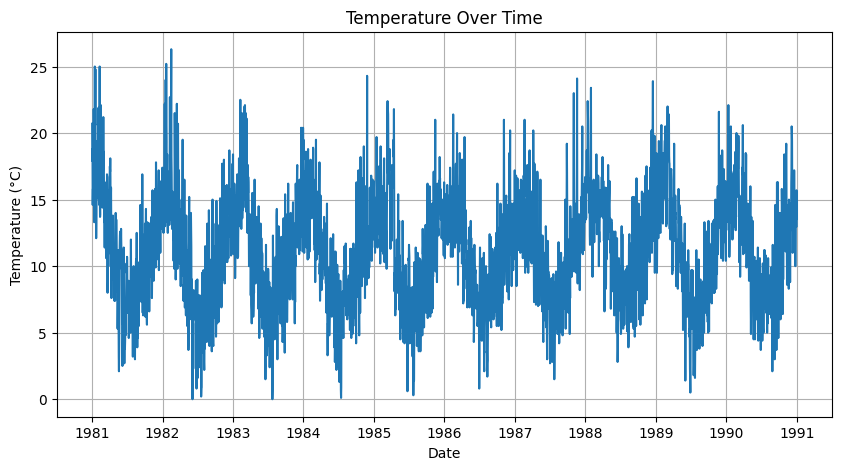

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Temperature', data=df)
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 17.22


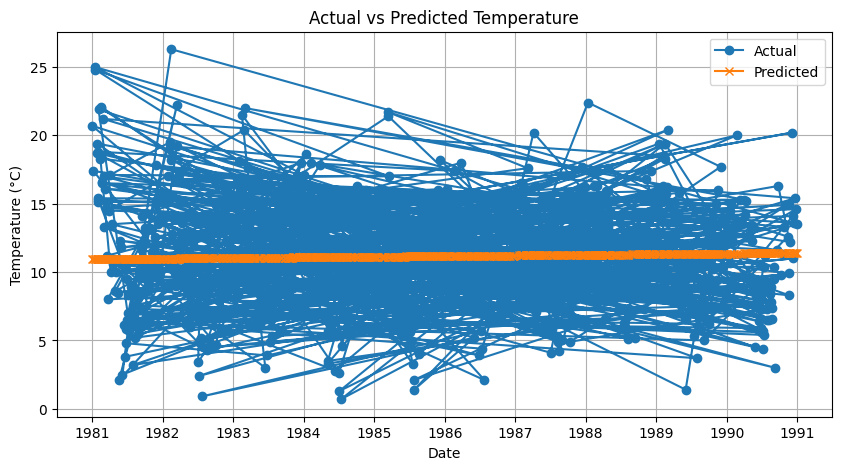

In [8]:
df_test = df.loc[X_test.index]
df_test = df_test.copy()
df_test['Predicted'] = y_pred

plt.figure(figsize=(10,5))
plt.plot(df_test['Date'], df_test['Temperature'], label='Actual', marker='o')
plt.plot(df_test['Date'], df_test['Predicted'], label='Predicted', marker='x')
plt.legend()
plt.title("Actual vs Predicted Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


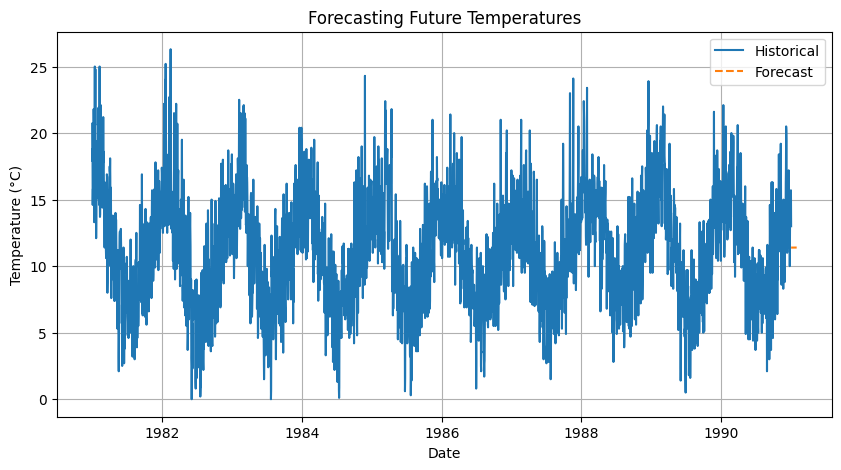

In [9]:
# Forecast next 30 days
future_dates = pd.date_range(start=df['Date'].max(), periods=30)
future_ordinals = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

future_predictions = model.predict(future_ordinals)

# Plot forecast
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Temperature'], label='Historical')
plt.plot(future_dates, future_predictions, label='Forecast', linestyle='--')
plt.legend()
plt.title("Forecasting Future Temperatures")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()
